In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
import numpy as np

# EDA

In [2]:
data = pd.read_csv('data (1).csv')
data.head(5)

,Unnamed: 0,metric.instance,metric.job,metric.team,mem_today,mem_1d_ago,mem_2d_ago,mem_3d_ago,mem_4d_ago,mem_5d_ago,...,disk_20d_ago,disk_21d_ago,disk_22d_ago,disk_23d_ago,disk_24d_ago,disk_25d_ago,disk_26d_ago,disk_27d_ago,disk_28d_ago,disk_29d_ago
0,0,msk1-sbp-int3-1.unix.nspk.ru:9100,sbp_jenkins_agent_node_exporter,sbp,14.352891,14.384908,16.031040,16.930944,17.018248,17.290738,...,5.139549,5.176518,5.173251,5.165265,5.150239,5.161137,5.164473,5.154436,5.149621,5.145337
1,1,msk1-sbp-int3-2.unix.nspk.ru:9100,sbp_jenkins_agent_node_exporter,sbp,17.433199,18.824995,18.161722,19.029127,19.290306,19.793070,...,5.411626,5.405821,5.397883,5.390175,5.383663,5.408497,5.401999,5.394285,5.414898,5.413964
2,2,msk1-sbp-int3-3.unix.nspk.ru:9100,sbp_jenkins_agent_node_exporter,sbp,12.443484,12.814160,14.328374,13.538137,14.105632,13.879826,...,5.245540,5.233579,5.227003,5.223885,5.255446,5.242642,5.235655,5.228440,5.223784,5.218225
3,3,msk1-sbp-int3-4.unix.nspk.ru:9100,sbp_jenkins_agent_node_exporter,sbp,8.983492,9.559299,10.071683,10.397744,13.446408,12.425900,...,4.185360,4.214938,4.218133,4.208438,4.199109,4.186423,4.175885,4.193900,4.185606,4.178834
4,4,msk1-clear176.unix.nspk.ru:9100,clearingpro_mir_test_perf_heavy_agents_node_ex...,clearingpro,57.182681,62.833589,55.470010,53.532785,48.167418,37.990881,...,9.162682,9.999905,10.169859,9.733511,10.008519,9.622560,8.801040,8.798581,8.792188,8.896198


In [3]:
data=data.drop(columns=["Unnamed: 0"], axis=1)

In [4]:
data.head(5)

,metric.instance,metric.job,metric.team,mem_today,mem_1d_ago,mem_2d_ago,mem_3d_ago,mem_4d_ago,mem_5d_ago,mem_6d_ago,...,disk_20d_ago,disk_21d_ago,disk_22d_ago,disk_23d_ago,disk_24d_ago,disk_25d_ago,disk_26d_ago,disk_27d_ago,disk_28d_ago,disk_29d_ago
0,msk1-sbp-int3-1.unix.nspk.ru:9100,sbp_jenkins_agent_node_exporter,sbp,14.352891,14.384908,16.031040,16.930944,17.018248,17.290738,15.437501,...,5.139549,5.176518,5.173251,5.165265,5.150239,5.161137,5.164473,5.154436,5.149621,5.145337
1,msk1-sbp-int3-2.unix.nspk.ru:9100,sbp_jenkins_agent_node_exporter,sbp,17.433199,18.824995,18.161722,19.029127,19.290306,19.793070,19.569264,...,5.411626,5.405821,5.397883,5.390175,5.383663,5.408497,5.401999,5.394285,5.414898,5.413964
2,msk1-sbp-int3-3.unix.nspk.ru:9100,sbp_jenkins_agent_node_exporter,sbp,12.443484,12.814160,14.328374,13.538137,14.105632,13.879826,12.218615,...,5.245540,5.233579,5.227003,5.223885,5.255446,5.242642,5.235655,5.228440,5.223784,5.218225
3,msk1-sbp-int3-4.unix.nspk.ru:9100,sbp_jenkins_agent_node_exporter,sbp,8.983492,9.559299,10.071683,10.397744,13.446408,12.425900,11.812398,...,4.185360,4.214938,4.218133,4.208438,4.199109,4.186423,4.175885,4.193900,4.185606,4.178834
4,msk1-clear176.unix.nspk.ru:9100,clearingpro_mir_test_perf_heavy_agents_node_ex...,clearingpro,57.182681,62.833589,55.470010,53.532785,48.167418,37.990881,53.010862,...,9.162682,9.999905,10.169859,9.733511,10.008519,9.622560,8.801040,8.798581,8.792188,8.896198


Shape of the dataset: (716, 93)
Columns: Index(['metric.instance', 'metric.job', 'metric.team', 'mem_today',
       'mem_1d_ago', 'mem_2d_ago', 'mem_3d_ago', 'mem_4d_ago', 'mem_5d_ago',
       'mem_6d_ago', 'mem_7d_ago', 'mem_8d_ago', 'mem_9d_ago', 'mem_10d_ago',
       'mem_11d_ago', 'mem_12d_ago', 'mem_13d_ago', 'mem_14d_ago',
       'mem_15d_ago', 'mem_16d_ago', 'mem_17d_ago', 'mem_18d_ago',
       'mem_19d_ago', 'mem_20d_ago', 'mem_21d_ago', 'mem_22d_ago',
       'mem_23d_ago', 'mem_24d_ago', 'mem_25d_ago', 'mem_26d_ago',
       'mem_27d_ago', 'mem_28d_ago', 'mem_29d_ago', 'cpu_today', 'cpu_1d_ago',
       'cpu_2d_ago', 'cpu_3d_ago', 'cpu_4d_ago', 'cpu_5d_ago', 'cpu_6d_ago',
       'cpu_7d_ago', 'cpu_8d_ago', 'cpu_9d_ago', 'cpu_10d_ago', 'cpu_11d_ago',
       'cpu_12d_ago', 'cpu_13d_ago', 'cpu_14d_ago', 'cpu_15d_ago',
       'cpu_16d_ago', 'cpu_17d_ago', 'cpu_18d_ago', 'cpu_19d_ago',
       'cpu_20d_ago', 'cpu_21d_ago', 'cpu_22d_ago', 'cpu_23d_ago',
       'cpu_24d_ago', 'cpu_25d_a

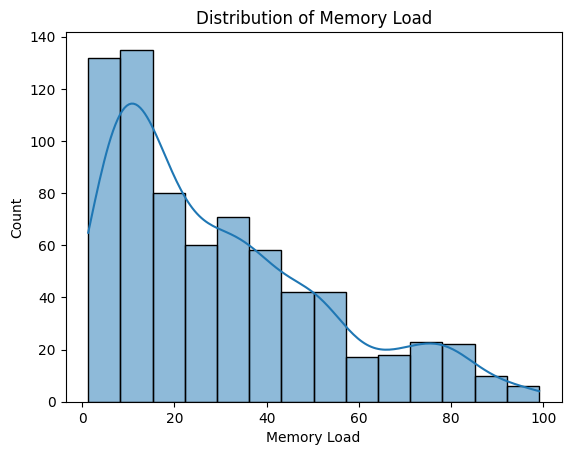

In [5]:
#  Basic data exploration
print("Shape of the dataset:", data.shape)
print("Columns:", data.columns)
print("Data types:\n", data.dtypes)

# Check for missing values
print("Missing values:\n", data.isnull().sum())


# Statistical summary
print("Statistical summary:\n", data.describe())

#  Visualize the data
sns.histplot(data=data, x='mem_today', kde=True)
plt.title("Distribution of Memory Load")
plt.xlabel("Memory Load")
plt.ylabel("Count")
plt.show()


In [6]:
#  Check for missing values
print("Missing values:\n", data.isnull().sum())

#  Handling missing values
data = data.dropna()
print("Shape after dropping servers with missing data:", data.shape)

#  Fill missing values with mean (for servers with missing data for some metrics and days)
data = data.fillna(data.mean())
print("Missing values after filling with mean:\n", data.isnull().sum())

# Fill missing values with forward fill (for servers with missing data for all 30 days)
data = data.ffill()
print("Missing values after forward fill:\n", data.isnull().sum())

# Fill missing values with backward fill (for servers with missing data for all 30 days)
data = data.bfill()
print("Missing values after backward fill:\n", data.isnull().sum())


Missing values:
 metric.instance     0
metric.job          0
metric.team         0
mem_today           0
mem_1d_ago          0
                   ..
disk_25d_ago       42
disk_26d_ago       42
disk_27d_ago       42
disk_28d_ago       42
disk_29d_ago       42
Length: 93, dtype: int64
Shape after dropping servers with missing data: (661, 93)
Missing values after filling with mean:
 metric.instance    0
metric.job         0
metric.team        0
mem_today          0
mem_1d_ago         0
                  ..
disk_25d_ago       0
disk_26d_ago       0
disk_27d_ago       0
disk_28d_ago       0
disk_29d_ago       0
Length: 93, dtype: int64
Missing values after forward fill:
 metric.instance    0
metric.job         0
metric.team        0
mem_today          0
mem_1d_ago         0
                  ..
disk_25d_ago       0
disk_26d_ago       0
disk_27d_ago       0
disk_28d_ago       0
disk_29d_ago       0
Length: 93, dtype: int64
Missing values after backward fill:
 metric.instance    0
metric.job 

<ipython-input-6-e7974512625a>:9: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


# Make clustering 

k-means

In [11]:
# Select relevant columns for clustering
cluster_columns = ['mem_today', 'cpu_today', 'disk_today']

# Perform feature scaling
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[cluster_columns])

# Perform clustering using K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data_scaled)

# Assign cluster labels to the dataset
data['cluster_label'] = kmeans.labels_

# Analyze the obtained clusters
cluster_counts = data['cluster_label'].value_counts()
print("Cluster counts:\n", cluster_counts)

cluster_means = data.groupby('cluster_label')[cluster_columns].mean()
print("Cluster means:\n", cluster_means)


Cluster counts:
 0    326
2    190
1    136
3      9
Name: cluster_label, dtype: int64
Cluster means:
                mem_today  cpu_today  disk_today
cluster_label                                  
0              14.615185   1.341054   18.759839
1              63.779638   7.520893   40.694399
2              25.884472   1.929539   51.669212
3              41.495801  63.013117   82.336553


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


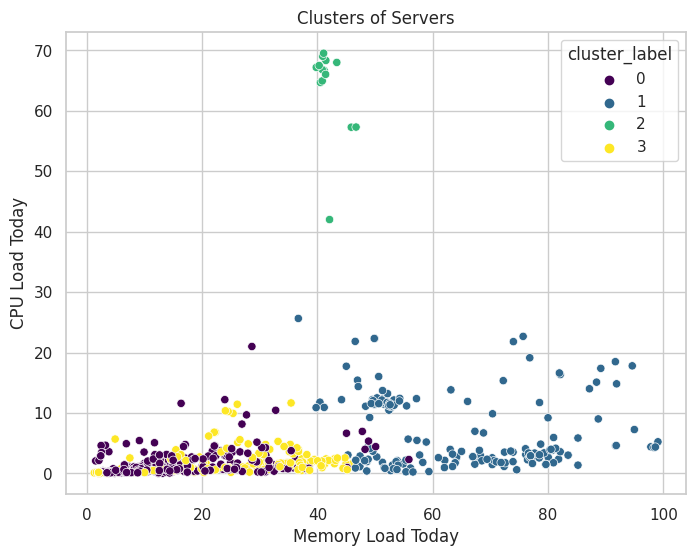

In [ ]:
sns.set(style='whitegrid')
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='mem_today', y='cpu_today', hue='cluster_label', palette='viridis')
plt.title('Clusters of Servers')
plt.xlabel('Memory Load Today')
plt.ylabel('CPU Load Today')
plt.show()

In [41]:
from sklearn.cluster import MeanShift

In [43]:
clus = MeanShift()
clus.fit(data_scaled)

# Assign cluster labels to the dataset
data['cluster_label'] = clus.labels_

# Analyze the obtained clusters
cluster_counts = data['cluster_label'].value_counts()
print("Cluster counts:\n", cluster_counts)

cluster_means = data.groupby('cluster_label')[cluster_columns].mean()
print("Cluster means:\n", cluster_means)

Cluster counts:
 0    554
2     58
3     29
4     10
1      8
5      2
Name: cluster_label, dtype: int64
Cluster means:
                mem_today  cpu_today  disk_today
cluster_label                                  
0              22.716196   1.948448   28.249499
1              41.420039  65.637900   86.977703
2              70.457034  10.167783   46.657601
3              32.560102   3.759659   80.643036
4              70.442038   2.278537   74.992887
5              39.394482  33.832566   33.781608


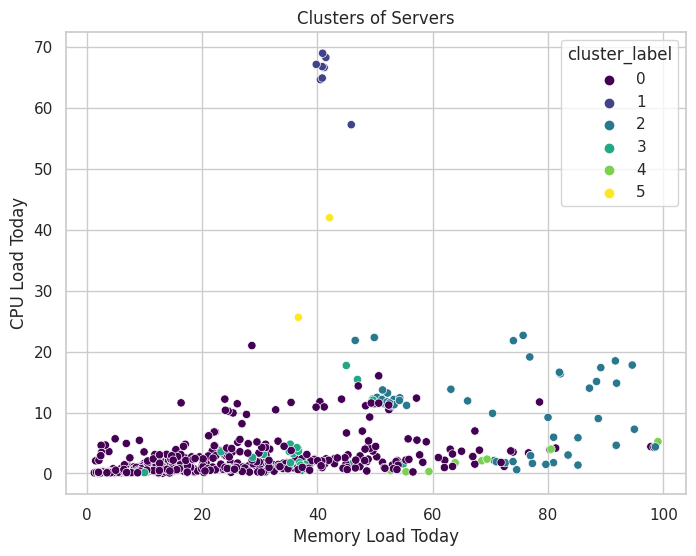

In [44]:
sns.set(style='whitegrid')
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='mem_today', y='cpu_today', hue='cluster_label', palette='viridis')
plt.title('Clusters of Servers')
plt.xlabel('Memory Load Today')
plt.ylabel('CPU Load Today')
plt.show()

AgglomerativeClustering

In [45]:
from sklearn.cluster import AgglomerativeClustering

In [46]:
clus = AgglomerativeClustering()
clus.fit(data_scaled)

# Assign cluster labels to the dataset
data['cluster_label'] = clus.labels_

# Analyze the obtained clusters
cluster_counts = data['cluster_label'].value_counts()
print("Cluster counts:\n", cluster_counts)

cluster_means = data.groupby('cluster_label')[cluster_columns].mean()
print("Cluster means:\n", cluster_means)

Cluster counts:
 1    358
0    303
Name: cluster_label, dtype: int64
Cluster means:
                mem_today  cpu_today  disk_today
cluster_label                                  
0              45.099340   6.284775   47.957806
1              14.148025   1.367231   21.444441


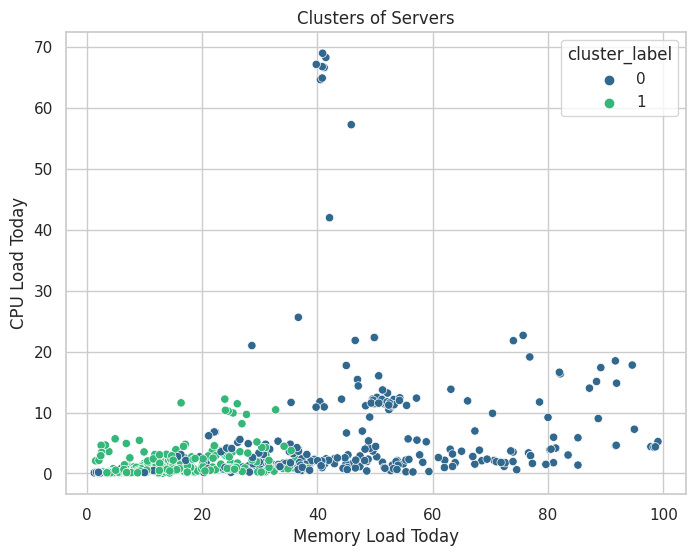

In [48]:
sns.set(style='whitegrid')
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='mem_today', y='cpu_today', hue='cluster_label', palette='viridis')
plt.title('Clusters of Servers')
plt.xlabel('Memory Load Today')
plt.ylabel('CPU Load Today')
plt.show()

In [ ]:
data.columns

Index(['metric.instance', 'metric.job', 'metric.team', 'mem_today',
       'mem_1d_ago', 'mem_2d_ago', 'mem_3d_ago', 'mem_4d_ago', 'mem_5d_ago',
       'mem_6d_ago', 'mem_7d_ago', 'mem_8d_ago', 'mem_9d_ago', 'mem_10d_ago',
       'mem_11d_ago', 'mem_12d_ago', 'mem_13d_ago', 'mem_14d_ago',
       'mem_15d_ago', 'mem_16d_ago', 'mem_17d_ago', 'mem_18d_ago',
       'mem_19d_ago', 'mem_20d_ago', 'mem_21d_ago', 'mem_22d_ago',
       'mem_23d_ago', 'mem_24d_ago', 'mem_25d_ago', 'mem_26d_ago',
       'mem_27d_ago', 'mem_28d_ago', 'mem_29d_ago', 'cpu_today', 'cpu_1d_ago',
       'cpu_2d_ago', 'cpu_3d_ago', 'cpu_4d_ago', 'cpu_5d_ago', 'cpu_6d_ago',
       'cpu_7d_ago', 'cpu_8d_ago', 'cpu_9d_ago', 'cpu_10d_ago', 'cpu_11d_ago',
       'cpu_12d_ago', 'cpu_13d_ago', 'cpu_14d_ago', 'cpu_15d_ago',
       'cpu_16d_ago', 'cpu_17d_ago', 'cpu_18d_ago', 'cpu_19d_ago',
       'cpu_20d_ago', 'cpu_21d_ago', 'cpu_22d_ago', 'cpu_23d_ago',
       'cpu_24d_ago', 'cpu_25d_ago', 'cpu_26d_ago', 'cpu_27d_ago',
      

# Train regression

In [12]:
# Split the data into features (X) and target variable (y)
X = data.drop(['metric.instance', 'metric.job', 'metric.team', 'cluster_label', 'mem_today'], axis=1)
y = data['mem_today']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


Mean Squared Error: 19.086001383993754
Mean Absolute Error: 1.5848791138138643
R-squared: 0.964047010403746


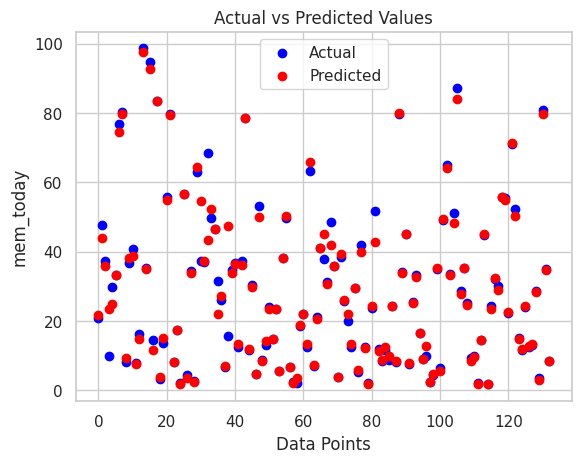

In [ ]:
plt.scatter(np.arange(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(np.arange(len(y_test)), y_pred, color='red', label='Predicted')
plt.xlabel('Data Points')
plt.ylabel('mem_today')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

# Train models on data

Model: Linear Regression
Mean Squared Error: 19.086001383993754
Mean Absolute Error: 1.5848791138138643
R-squared: 0.964047010403746



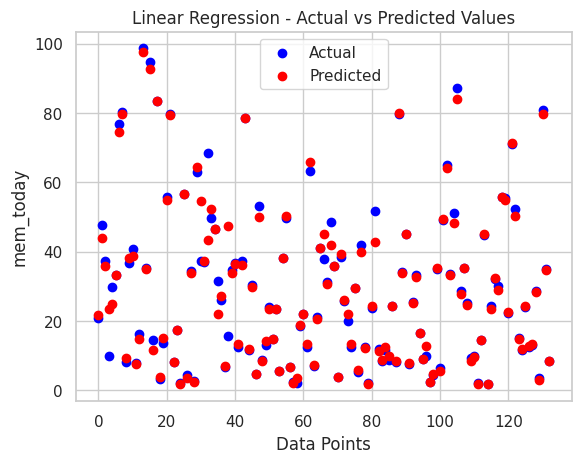

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.4459e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model: Ridge
Mean Squared Error: 16.68148082414996
Mean Absolute Error: 1.531112687017788
R-squared: 0.9685764925583759



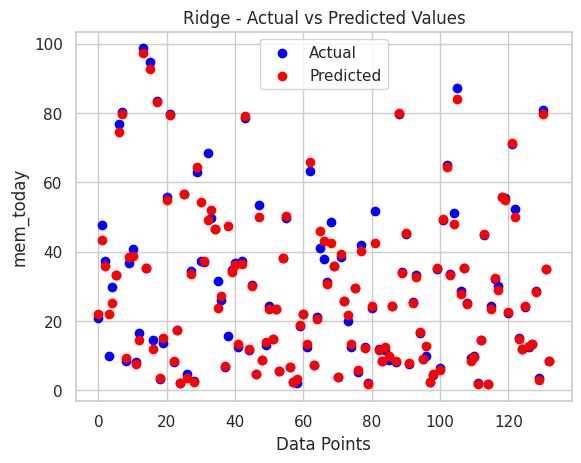

Model: Lasso
Mean Squared Error: 10.70338828685423
Mean Absolute Error: 0.9153609965166223
R-squared: 0.9798376412125454



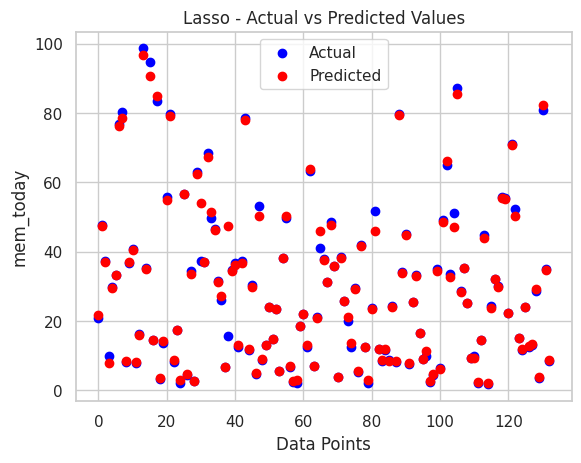

Model: ElasticNet
Mean Squared Error: 10.407146328640245
Mean Absolute Error: 0.9390776933840291
R-squared: 0.980395682880224



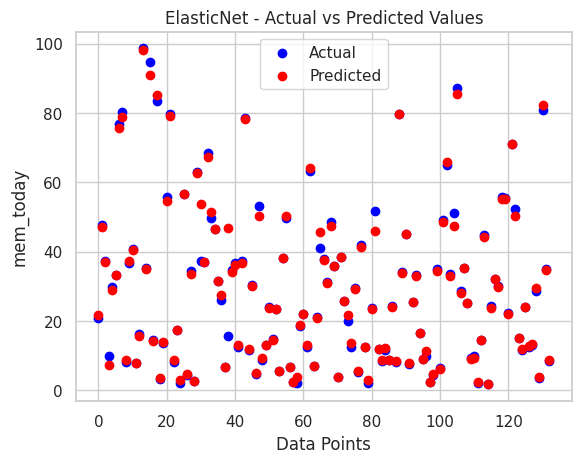

In [ ]:
# Split the data into features (X) and target variable (y)
X = data.drop(['metric.instance', 'metric.job', 'metric.team', 'cluster_label', 'mem_today'], axis=1)
y = data['mem_today']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models
models = [
    ("Linear Regression", LinearRegression()),
    ("Ridge", Ridge()),
    ("Lasso", Lasso()),
    ("ElasticNet", ElasticNet())
]

# Iterate over the models
for model_name, model in models:
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print the evaluation metrics
    print(f"Model: {model_name}")
    print("Mean Squared Error:", mse)
    print("Mean Absolute Error:", mae)
    print("R-squared:", r2)
    print()

    # Visualize the predictions and actual values
    plt.scatter(np.arange(len(y_test)), y_test, color='blue', label='Actual')
    plt.scatter(np.arange(len(y_test)), y_pred, color='red', label='Predicted')
    plt.xlabel('Data Points')
    plt.ylabel('mem_today')
    plt.title(f'{model_name} - Actual vs Predicted Values')
    plt.legend()
    plt.show()


# Select best model

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models
models = [
    ("Linear Regression", LinearRegression()),
    ("Ridge", Ridge()),
    ("Lasso", Lasso()),
    ("ElasticNet", ElasticNet())
]

best_model = None
best_metric = float('inf')

# Iterate over the models
for model_name, model in models:
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print the evaluation metrics
    print(f"Model: {model_name}")
    print("Mean Squared Error:", mse)
    print("Mean Absolute Error:", mae)
    print("R-squared:", r2)
    print()

    # Check if the current model is the best based on the evaluation metric
    if mse < best_metric:
        best_model = model_name
        best_metric = mse

# Print the best model
print("Best Model:", best_model)


Model: Linear Regression
Mean Squared Error: 19.086001383993754
Mean Absolute Error: 1.5848791138138643
R-squared: 0.964047010403746

Model: Ridge
Mean Squared Error: 16.68148082414996
Mean Absolute Error: 1.531112687017788
R-squared: 0.9685764925583759

Model: Lasso
Mean Squared Error: 10.70338828685423
Mean Absolute Error: 0.9153609965166223
R-squared: 0.9798376412125454

Model: ElasticNet
Mean Squared Error: 10.407146328640245
Mean Absolute Error: 0.9390776933840291
R-squared: 0.980395682880224

Best Model: ElasticNet


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.4459e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Boosting models

In [9]:
xgbr = xgb.XGBRegressor(verbosity=0) 

In [13]:
xgbr.fit(X_train, y_train)
y_pred = xgbr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 22.383497688857144
Mean Absolute Error: 1.454787267873381
R-squared: 0.9578353976118772


In [18]:
import lightgbm as lg

In [21]:
model = lg.LGBMRegressor() 

In [23]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 13.233820616175787
Mean Absolute Error: 1.2640156384629542
R-squared: 0.9750709745137563


Neural Network - catboost

In [14]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 8.3 MB/s eta 0:00:00


In [15]:
from catboost import CatBoostRegressor

In [16]:
model = CatBoostRegressor()

In [17]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

Learning rate set to 0.037013
0:	learn: 21.7119287	total: 96.4ms	remaining: 1m 36s
1:	learn: 21.0748244	total: 137ms	remaining: 1m 8s
2:	learn: 20.4918839	total: 181ms	remaining: 1m
3:	learn: 19.9399678	total: 234ms	remaining: 58.2s
4:	learn: 19.3490578	total: 267ms	remaining: 53.2s
5:	learn: 18.7792941	total: 335ms	remaining: 55.5s
6:	learn: 18.2611628	total: 397ms	remaining: 56.4s
7:	learn: 17.7114222	total: 441ms	remaining: 54.7s
8:	learn: 17.2217733	total: 488ms	remaining: 53.8s
9:	learn: 16.7618098	total: 533ms	remaining: 52.8s
10:	learn: 16.3115737	total: 618ms	remaining: 55.6s
11:	learn: 15.8673933	total: 680ms	remaining: 56s
12:	learn: 15.4501567	total: 737ms	remaining: 55.9s
13:	learn: 15.0427204	total: 783ms	remaining: 55.1s
14:	learn: 14.6579283	total: 841ms	remaining: 55.2s
15:	learn: 14.2976206	total: 927ms	remaining: 57s
16:	learn: 13.8954792	total: 980ms	remaining: 56.7s
17:	learn: 13.5168810	total: 1.04s	remaining: 56.6s
18:	learn: 13.1637732	total: 1.08s	remaining: 55.

In [19]:
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 20.54675385137693
Mean Absolute Error: 2.1397201215198183
R-squared: 0.9612953382642597


Model: XGBRegressor
Mean Squared Error: 22.383497688857144
Mean Absolute Error: 1.454787267873381
R-squared: 0.9578353976118772



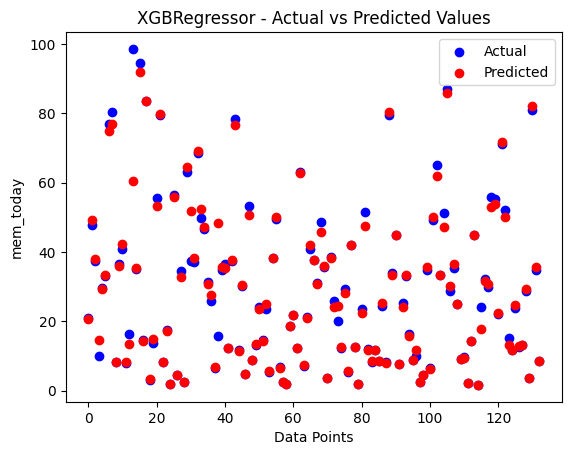

Model: LGBMRegressor
Mean Squared Error: 13.233820616175787
Mean Absolute Error: 1.2640156384629542
R-squared: 0.9750709745137563



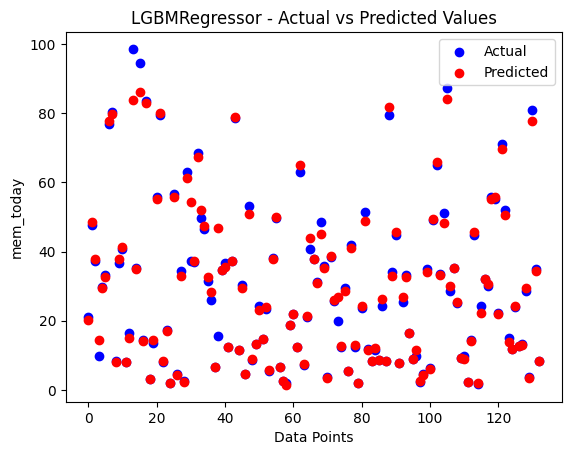

Learning rate set to 0.037013
0:	learn: 21.7119287	total: 39.7ms	remaining: 39.6s
1:	learn: 21.0748244	total: 60.4ms	remaining: 30.1s
2:	learn: 20.4918839	total: 80.3ms	remaining: 26.7s
3:	learn: 19.9399678	total: 99.6ms	remaining: 24.8s
4:	learn: 19.3490578	total: 119ms	remaining: 23.8s
5:	learn: 18.7792941	total: 143ms	remaining: 23.7s
6:	learn: 18.2611628	total: 166ms	remaining: 23.5s
7:	learn: 17.7114222	total: 186ms	remaining: 23.1s
8:	learn: 17.2217733	total: 212ms	remaining: 23.3s
9:	learn: 16.7618098	total: 233ms	remaining: 23s
10:	learn: 16.3115737	total: 253ms	remaining: 22.8s
11:	learn: 15.8673933	total: 274ms	remaining: 22.6s
12:	learn: 15.4501567	total: 295ms	remaining: 22.4s
13:	learn: 15.0427204	total: 320ms	remaining: 22.6s
14:	learn: 14.6579283	total: 341ms	remaining: 22.4s
15:	learn: 14.2976206	total: 362ms	remaining: 22.3s
16:	learn: 13.8954792	total: 384ms	remaining: 22.2s
17:	learn: 13.5168810	total: 404ms	remaining: 22s
18:	learn: 13.1637732	total: 431ms	remaining

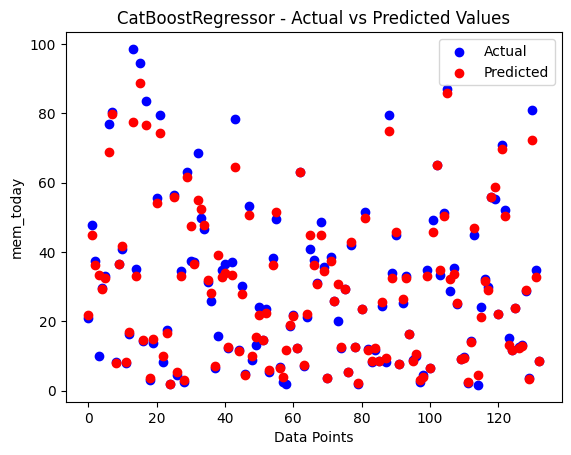

In [27]:
X = data.drop(['metric.instance', 'metric.job', 'metric.team', 'cluster_label', 'mem_today'], axis=1)
y = data['mem_today']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models
models = [
    ("XGBRegressor", xgb.XGBRegressor()),
    ("LGBMRegressor", lg.LGBMRegressor()),
    ("CatBoostRegressor", CatBoostRegressor())
]

# Iterate over the models
for model_name, model in models:
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print the evaluation metrics
    print(f"Model: {model_name}")
    print("Mean Squared Error:", mse)
    print("Mean Absolute Error:", mae)
    print("R-squared:", r2)
    print()

    # Visualize the predictions and actual values
    plt.scatter(np.arange(len(y_test)), y_test, color='blue', label='Actual')
    plt.scatter(np.arange(len(y_test)), y_pred, color='red', label='Predicted')
    plt.xlabel('Data Points')
    plt.ylabel('mem_today')
    plt.title(f'{model_name} - Actual vs Predicted Values')
    plt.legend()
    plt.show()

Ensembling

In [28]:
from sklearn.tree import DecisionTreeRegressor

In [29]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [30]:
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 13.642374629642932
Mean Absolute Error: 1.3567076253171304
R-squared: 0.9743013665743998


In [31]:
from sklearn.ensemble import RandomForestRegressor

In [32]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [33]:
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 11.668949582886698
Mean Absolute Error: 1.1755049919427794
R-squared: 0.9780187785533445


Custom nn

In [35]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(528, 89)
(528,)
(133, 89)
(133,)


In [37]:
# importing the libraries
from keras.models import Sequential
from keras.layers import Dense
 
# create ANN model
model = Sequential()
 

model.add(Dense(units=5, input_dim=89, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))
 
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))
 
# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')
 
# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 20, epochs = 500, verbose=1)

Epoch 1/500
27/27 [==============================] - 1s 3ms/step - loss: 1275.5635
Epoch 2/500
27/27 [==============================] - 0s 2ms/step - loss: 1263.3402
Epoch 3/500
27/27 [==============================] - 0s 2ms/step - loss: 1253.8638
Epoch 4/500
27/27 [==============================] - 0s 2ms/step - loss: 1244.7836
Epoch 5/500
27/27 [==============================] - 0s 2ms/step - loss: 1235.9083
Epoch 6/500
27/27 [==============================] - 0s 2ms/step - loss: 1227.0020
Epoch 7/500
27/27 [==============================] - 0s 2ms/step - loss: 1218.3790
Epoch 8/500
27/27 [==============================] - 0s 3ms/step - loss: 1209.7734
Epoch 9/500
27/27 [==============================] - 0s 2ms/step - loss: 1201.3323
Epoch 10/500
27/27 [==============================] - 0s 2ms/step - loss: 1192.9963
Epoch 11/500
27/27 [==============================] - 0s 2ms/step - loss: 1184.7583
Epoch 12/500
27/27 [==============================] - 0s 2ms/step - loss: 1176.6450
E

In [39]:
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

5/5 [==============================] - 0s 2ms/step


In [40]:
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 73.16746504047144
Mean Absolute Error: 3.9475058870263187
R-squared: 0.8621718055836218
